$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Linear Logistic Regression

## Motivation and Setup

Recall that a linear model used for classification can result in masking. We discussed fixing this by using different
shaped membership functions, other than linear.

Our first approach to this was to use generative models (Normal distributions) to model the data
from each class, forming $p(\xv|C=k)$.  Using Bayes Theorem, we converted this to $p(C=k|\xv)$ and
derived QDA and LDA.

Now we will derive a linear model that directly predicts $p(C=k|\xv)$, resulting in the algorithm called logisitic
regression.  It is derived to maximize the likelihood of the data, given a bunch of samples and their class labels.

Remember this picture?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/indicatorvarsmax2.png" width=400>

The problem was that the green line for Class 2 was too low.
In fact, all lines are too low in the middle of x range.  Maybe we
can reduce the masking effect by

   * requiring the function values to be between 0 and 1, and
   * requiring them to sum to 1 for every value of x.

We can satisfy those two requirements by directly representing
$p(C=k|\xv)$ as

$$
    \begin{align*}
      p(C=k|\xv) = \frac{f(\xv;\wv_k)}{\sum_{m=1}^K f(\xv;\wv_m)}
    \end{align*}
$$

with $f(\xv;\wv) \ge 0$. We haven't discussed the form of $f$ yet, but $\wv$
represents the parameters of $f$ that we will tune to fit the
training data (later).

This is certainly an expression that is between 0 and 1 for
any $\xv$.
And we have $p(C=k|\xv)$ expressed directly, as opposed to
the previous generative approach of first modeling $p(\xv|C=k)$
and using Bayes' theorem to get $p(C=k|\xv)$.

Let's give the above expression another name

$$
    \begin{align*}
      g_k(\xv) = p(C=k|\xv) = \frac{f(\xv;\wv_k)}{\sum_{m=1}^K f(\xv;\wv_m)}
    \end{align*}
$$

Now let's deal with our requirement that the sum must equal 1

$$
      \begin{align*}
      1  = \sum_{k=1}^K p_k(C=k|\xv) = \sum_{k=1}^K g_k(\xv)
      \end{align*}
$$

However, this constraint overdetermines the $g_k(\xv)$.  If

$$
      \begin{align*}
        1 = a + b + c
      \end{align*}
$$

must be true, then given values for $a$ and $b$, $c$ is already
determined, as $c = 1 - a - b$.

Another way to say this is that we can set $c$ to any value,
and values for $a$ and $b$ can still be found that satisfy the
above equation. For example

$$
      \begin{align*}
        1 = (a-c/2) + (b-c/2) + 2c
      \end{align*}
$$


So, let's just set the final $f(\xv;\wv_k)$, for $k=K$, to be 1.  Now

$$
      \begin{align*}
        g_k(\xv) = \left \{ \begin{array}{ll}
            \dfrac{f(\xv;\wv_k)}{1+\sum_{m=1}^{K-1} f(\xv;\wv_m)}, & k < K\\
            \dfrac{1}{1+\sum_{m=1}^{K-1} f(\xv;\wv_m)}, & k = K
          \end{array}
        \right .
      \end{align*}
$$

## Derivation

Whatever we choose for $f$, we must make a plan for
optimizing its parameters $\wv$.  How?

Let's maximize the likelihood of the data.  So, what is the
likelihood of training data consisting of samples $\{\xv_1, \xv_2, \ldots, \xv_N\}$ and class indicator variables

$$
  \begin{align*}
    \begin{pmatrix}
      t_{1,1} & t_{1,2} & \ldots & t_{1,K}\\
      t_{2,1} & t_{2,2} & \ldots & t_{2,K}\\
      \vdots\\
      t_{N,1} & t_{N,2} & \ldots & t_{N,K}
    \end{pmatrix}
  \end{align*}
$$

with every value $t_{n,k}$ being 0 or 1, and each row of this matrix
contains a single 1. (We can also express $\{\xv_1, \xv_2,
\ldots, \xv_N\}$ as an $N \times D$ matrix, but we will be using
single samples $\xv_n$ more often in the following.)

## Data Likelihood

The likelihood is just the product of all $p(C=\text{class of }
n^\text{th}\text{ sample}\,|\,\xv_n)$ values
for sample $n$.  A common way to express this product, using those handy indicator variables is

$$
    \begin{align*}
      L(\betav) = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n)^{t_{n,k}}
    \end{align*}
$$


Say we have three classes ($K=3$) and training sample $n$ is from Class 2, then the  product is

$$
      \begin{align*}
        p(C=1\,|\,\xv_n)^{t_{n,1}} p(C=2\,|\,\xv_n)^{t_{n,2}}
        p(C=3\,|\,\xv_n)^{t_{n,3}} & = 
         p(C=1\,|\,\xv_n)^0 p(C=2\,|\,\xv_n)^1 p(C=3\,|\,\xv_n)^0 \\
        & = 1\; p(C=2\,|\,\xv_n)^1 \; 1 \\
        & = p(C=2\,|\,\xv_n) 
      \end{align*}
$$

This shows how the indicator variables as exponents select the correct terms to be included in the product.

## Maximizing the Data Likelihood

So, we want to find $\wv$ that maximizes the data likelihood.  How shall we proceed?

$$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$


Right.  Find the derivative with respect to each component of $\wv$, or the gradient with respect to $\wv$.  But there is
a mess of products in this. So...

Right again.  Work with the natural logarithm  $\log L(\wv)$ which we will call $LL(\wv)$.

$$
    \begin{align*}
      LL(\wv) = \log L(\wv) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log p(C=k\,|\,\xv_n)
    \end{align*}
$$

## Gradient Ascent

Unfortunately, the gradient of $LL(\wv)$ with respect to
$\wv$ is not linear in $\wv$, so we cannot simply set the
result equal to zero and solve for $\wv$.

Instead, we do gradient ascent. (Why "ascent"?)

  * Initialize $\wv$ to some value.
  * Make small change to $\wv$ in the direction of the  gradient of $LL(\wv)$ with respect to $\wv$  (or $\grad_{\wv} LL(\wv)$)
  * Repeat above step until $LL(\wv)$ seems to be at a maximum.

$$
      \begin{align*}
        \wv \leftarrow \wv + \alpha \grad_{\wv} LL(\wv)
      \end{align*}
$$

where $\alpha$ is a constant that affects the step size.

Remember that $\wv$ is a matrix of parameters, with, let's
say, columns corresponding to the values required for each $f$, of
which there are $K-1$.

We can work on the update formula and $\grad_{\wv} LL(\wv)$ one column at
a time

$$
    \begin{align*}
        \wv_k  \leftarrow \wv_k + \alpha \grad_{\wv_k} LL(\wv)
    \end{align*}
$$

and combine them at the end.

$$
    \begin{align*}
        \wv  \leftarrow \wv + \alpha (\grad_{\wv_1} LL(\wv),
        \grad_{\wv_2} LL(\wv), \ldots, \grad_{\wv_{K-1}} LL(\wv))
    \end{align*}
$$


Remembering that $\frac{\partial \log h(x)}{\partial x} = \frac{1}{h(x)}\frac{\partial h(x)}{x}$ and
that $p(C=k|\xv_n) = g_k(\xv_n)$ 

$$
      \begin{align*}
      LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K  t_{n,k} \log p(C=k\,|\,\xv_n)\\
      & = \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_k(\xv_n)\\
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K
      \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j} g_k(\xv_n)
      \end{align*}
$$

It would be super nice if $\grad_{\wv_j} g_k(\xv_n)$
includes the factor $g_k(\xv_n)$ so that it will cancel
with the $g_k(\xv_n)$ in the denominator.

Can get this by defining

$$
    \begin{align*}
      f(\xv_n;\wv_k) & = \ebx{k} \;\;\;\;\text{ so}\\
      g_k(\xv_n) & = \frac{f(\xv_n;\wv_k)}{1+\sum_{m=1}^{K-1} f(\xv_n;\wv_m)}
    \end{align*}
$$

Now we can work on $\grad_{\wv_j} g_k(\xv_n)$.  Let's start with the case where $k < K$, so 

$$
\begin{align*}
g_k(\xv_n) = \frac{\ebx{k}}{1+\sum_{m=1}^{K-1} \ebx{m}}
\end{align*}
$$

So

$$
    \begin{align*}
      \grad_{\wv_j} g_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{1+\sum_{m=1}^{K-1} \ebx{m}} \right )\\
    & = \grad_{\wv_j} \left [ \left (1 + \sum_{m=1}^{K-1} \ebx{m} \right )^{-1} \ebx{k} \right ] 
    \end{align*}
$$
Since
$$
\begin{align*}
\grad_{\wv_j} \ebx{k} &= \begin{cases}
\xv_n \ebx{k}, & \text{if} k=j\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$
and
$$
\begin{align*}
\grad_{\wv_j} \sum_{m=1}^K-1 \ebx{m} &= \xv_n \ebx{k}
\end{align*}
$$
then
$$
    \begin{align*}
      \grad_{\wv_j} g_k(\xv_n) & = \grad_{\wv_j} \left (\frac{\ebx{k}}{1+\sum_{m=1}^{K-1} \ebx{m}} \right )\\
    & = -1 \left (1 + \sum_{m=1}^{K-1} \ebx{m} \right )^{-2} \xv_n \ebx{j}
    \ebx{k} + \left (1 + \sum_{m=1}^{K-1} \ebx{m} \right )^{-1} 
    \begin{cases} \xv_n \ebx{k},& \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
& = -\frac{\ebx{k}}{1+\sum_{m=1}^{K-1} \ebx{m}}
  \frac{\ebx{j}}{1+\sum_{m=1}^{K-1} \ebx{j}} \xv_n +
  \begin{cases} \frac{\ebx{j}}{1+\sum_{m=1}^{K-1} \ebx{j}} \xv_n,& \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
%& = \frac{\ebx{k}}{ 1 + \sum_{m=1}^{K-1} \ebx{m} } 
& = - g_k(\xv_n) g_j(\xv_n) \xv_n + \begin{cases} g_j(\xv_n) \xv_n,^ \text{if} j=k\\ 0,& \text{otherwise} \end{cases}\\
& = g_k(\xv_n) (\delta_{jk} - g_j(\xv_n)) \xv_n
    \end{align*}
$$
where $\delta_{jk} = 1$ if $j=k$, 0 otherwise.

We must do this again for the case where $k=K$.

$$
    \begin{align*}
      \grad_{\wv_j} g_K(\xv_n) & = \grad_{\wv_j} \left (\frac{1}{1+\sum_{m=1}^{K-1} \ebx{m}} \right )\\
    & = \grad_{\wv_j}  \left (1 + \sum_{m=1}^{K-1} \ebx{m} \right )^{-1} \\
    & = -1 \left (1 + \sum_{m=1}^{K-1} \ebx{m} \right )^{-2} \ebx{j} \xv_n \\
    & = - \frac{\ebx{j}}{(1 + \sum_{m=1}^{K-1} \ebx{m})^2 } \xv_n \\
    & = - \frac{\ebx{j}}{1 + \sum_{m=1}^{K-1} \ebx{m} }  \frac{1}{1 + \sum_{m=1}^{K-1} \ebx{m} } \xv_n \\
    & = -g_j(\xv_n) g_K(\xv_n) \xv_n
    \end{align*}
$$

We can make this last expression look like the result we obtained for $k < K$,

$$
    \begin{align*}
      \grad_{\wv_j} g_K(\xv_n) &  = -g_j(\xv_n) g_K(\xv_n) \xv_n\\
    & = g_K(\xv_n) (\delta_{jK} - g_j(\xv_n)) \xv_n
    \end{align*}
$$

where $\delta_{jK} = 1$ if $j=K$, 0 otherwise, because $j$ will never equal $K$ as we only have $\wv_j$ vectors for classes $j=1,\ldots,K-1$. So, the expression

$$
\grad_{\wv_j} g_k(\xv_n) = g_k(\xv_n) (\delta_{jk} - g_j(\xv_n)) \xv_n
$$

works for all cases,  $k=1,\ldots,K$.

Substituting this back into the log likelihood expression, we get

$$
    \begin{align*}
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j} g_k(\xv_n)\\
    & = \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_k(\xv_n)} \left (g_k(\xv_n) (\delta_{jk} - g_j(\xv_n)) \xv_n \right )\\
    & = \sum_{n=1}^N \left ( \sum_{k=1}^K t_{n,k} \delta_{jk} -
  g_j(\xv_n) \sum_{k=1}^K t_{n,k} \right ) \xv_n\\
& = \sum_{n=1}^N  (t_{n,j} - g_j(\xv_n)) \xv_n
    \end{align*}
$$

which results in this update rule for $\wv_j$

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$


How do we do this in python?  First, a summary of the derivation.

## Derivation Summary

$P(C=k\,|\,\xv_n)$ and the data likelihood we want to maximize:

$$
    \begin{align*}
      g_k(\xv_n) & = P(C=k\,|\,\xv_n) =
      \frac{f(\xv_n;\wv_k)}{1+\sum_{m=1}^{K-1} f(\xv_n;\wv_m)}\\
      f(\xv_n;\wv_k) & = \left \{ \begin{array}{ll} \ebx{k}; & k < K\\ 1;& k = K \end{array} \right .\\
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^{t_{n,k}}\\
      & = \prod_{n=1}^N \prod_{k=1}^K g_k(\xv_n)^{t_{n,k}}
    \end{align*}
$$


Gradient of log likelihood with respect to $\wv_j$:

$$         
    \begin{align*}
      \grad_{\wv_j} LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K
      \frac{t_{n,k}}{g_k(\xv_n)} \grad_{\wv_j}
      g_k(\xv_n)\\
%& = \sum_{n=1}^N \left ( \sum_{k=1}^K t_{n,k} \delta_{jk} -
%  g_j(\xv_n) \sum_{k=1}^K t_{n,k} \right )\\
& = \sum_{n=1}^N \xv_n (t_{n,j} - g_j(\xv_n))
\end{align*}
$$

which results in this update rule for $\wv_j$

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$

## Implementation in Python

Update rule for $\wv_j$

$$
    \begin{align*}
      \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
      (t_{n,j} - g_j(\xv_n)) \xv_n
    \end{align*}
$$

What are shapes of each piece?  Remember that whenever we are dealing with weighted sums of inputs, as we are here, add the constant 1 to the front of each sample.

  * $\xv_n$ is $(D+1) \times 1$ ($+1$ for the constant 1 input)
  * $\wv_j$ is  $(D+1) \times 1$ 
  * $t_{n,j} - g_j(\xv_n)$ is   a scalar

So, this all works. But, notice the sum is over $n$, and each
term in the product as $n$ components, so we can do this as a dot product.

Let's remove the sum and replace subscript $n$ with
*. 

$$
    \begin{align*}
      \wv_j  &\leftarrow \wv_j + \alpha \sum_{n=1}^N
      (t_{n,j} - g_j(\xv_n)) \xv_n\\
      \wv_j  &\leftarrow \wv_j + \alpha (t_{*,j} - g_j(\xv_*)) \xv_*\\
    \end{align*}
$$

What are shapes of each piece?

  * $(t_{*,j} - g_j(\xv_*))$ is $N \times 1$
  * $\xv_* = X$ is  $N \times (D+1)$
  * $\wv_j$ is  $(D+1) \times 1$ 

So, this will work if we transpose $X$ and premultiply it and define
$g$ as a function that accepts $\Xv$.

$$
    \begin{align*}
%      \wv_j  &\leftarrow \wv_j + \alpha (t_{*,j} -
%      g(\xv_*;\wv_j)) \xv_*\\
      \wv_j  &\leftarrow \wv_j + \alpha \Xv^T (t_{*,j} -
      g_j(\Xv))
    \end{align*}
$$

Let's keep going...and try to make this expression work for
all of the $\wv$'s.
Playing with the subscripts again, replace $j$ with *.

$$
    \begin{align*}
      \wv_j  &\leftarrow \wv_j + \alpha \Xv^T (t_{*,j} - g_j(\Xv))\\
      \wv_*  &\leftarrow \wv_* + \alpha \Xv^T (t_{*,*} - g_*(\Xv))
    \end{align*}
$$

Now what are shapes? Careful...$\wv_*$, the matrix of all weights,
only has $K-1$ columns.  Why?

  * $\wv_* = \wv$ is  $(D+1) \times (K-1)$
  * $t_{*,*} = T$ is  $N \times (K-1)$
  * $g_*(\Xv)$ is   $N \times (K-1)$
  * $t_{*,*} - g_*(\Xv)$ is  $N \times (K-1)$
  * So, $\Xv^T (t_{*,*} - g_*(\Xv))$ is  $(D+1) \times (K-1)$
  * So, $\Xv^T (T - g(\Xv))$ is  $(D+1) \times (K-1)$

Now our update equation for all $\wv$'s is

$$
    \begin{align*}
      \wv  &\leftarrow \wv + \alpha \Xv^T (T - g(\Xv))
    \end{align*}
$$


We had defined

$$
    \begin{align*}
      f(\xv_n;\wv_k) & =  \ebx{k},\;\;  \mathrm{ for } \; k < K \\
        g_k(\xv) &= \left \{ \begin{array}{ll} \dfrac{f(\xv;\wv_k)}{1+\sum_{m=1}^{K-1} f(\xv;\wv_m)}; & k < K\\
\dfrac{1}{1+\sum_{m=1}^{K-1} f(\xv;\wv_m)}; & k= K\\
                             \end{array} \right .
      \end{align*}
$$

Changing these to handle all samples $\Xv$ and all parameters
$\wv$ we have

$$
    \begin{align*}
      f(\Xv;\wv) & = e^{\Xv \wv}\\
      g(\Xv) & = \left [ \frac{f(\Xv;\wv)}{\text{rowSums}(f(\Xv;\wv)}, \frac{1}{\text{rowSums}(f(\Xv;\wv))} \right ]
    \end{align*}
$$


Given training data $\Xv$ ($N\times (D+1)$) and class
indicator variables $T$ ($N \times (K-1)$), these expressions
can be performed with the following code.

First, we need a function to create indicator variables from the class labels, to get

$$
\begin{bmatrix}
1\\
2\\
2\\
1\\
3
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def makeIndicatorVars(T):
    # Make sure T is two-dimensiona. Should be nSamples x 1.
    if T.ndim == 1:
        T = T.reshape((-1,1))    
    return (T == np.unique(T)).astype(int)

In [3]:
T = np.array([1,2,2,1,3]).reshape((-1,1))
T

array([[1],
       [2],
       [2],
       [1],
       [3]])

In [4]:
makeIndicatorVars(T)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [5]:
# import pdb
def g(X,w):
    fs = np.exp(np.dot(X, w))  # N x K-1
    denom = (1 + np.sum(fs,axis=1)).reshape((-1,1))
    # pdb.set_trace()
    gs = fs / denom
    # print(gs[:10,:])
    return np.hstack((gs,1/denom))

The function ```g``` is sometimes called the *softmax* function. 

Now the updates to $\wv$ can be formed with code like

    TI = makeIndicatorVars(T)   
    w = np.zeros((X.shape[1],TI.shape[1]-1))
    alpha = 0.0001
    for step in range(1000):
        gs = g(X,w)
        # Error does not involve the last column of indicator variables in TI nor gs
        w = w + alpha * np.dot(X.T, TI[:,:-1] - gs[:,:-1]) 
        
Here is code for applying linear logistic regression to the Parkinsons data from last lecture.

In [6]:
def loadParkinsonsData(filename='parkinsons.data'):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]

    data = np.loadtxt(f ,delimiter=',', usecols=1+np.arange(23))

    targetColumn = names.index("status")
    XColumns = np.arange(23)
    XColumns = np.delete(XColumns, targetColumn)
    X = data[:,XColumns]
    T = data[:,targetColumn].reshape((-1,1)) # to keep 2-d matrix form
    names.remove("status")
    return X,T,names

In [7]:
X,T,names = loadParkinsonsData()

In [8]:
X.shape,T.shape,names

((195, 22),
 (195, 1),
 ['MDVP:Fo(Hz)',
  'MDVP:Fhi(Hz)',
  'MDVP:Flo(Hz)',
  'MDVP:Jitter(%)',
  'MDVP:Jitter(Abs)',
  'MDVP:RAP',
  'MDVP:PPQ',
  'Jitter:DDP',
  'MDVP:Shimmer',
  'MDVP:Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'MDVP:APQ',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'spread1',
  'spread2',
  'D2',
  'PPE'])

In [9]:
def standardize(X,mean,stds):
    return (X - mean)/stds

In [10]:
def runParkLogReg(filename, trainFraction):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]

    data = np.loadtxt(f ,delimiter=',', usecols=1+np.arange(23))

    targetColumn = names.index("status")
    XColumns = np.arange(23)
    XColumns = np.delete(XColumns, targetColumn)
    X = data[:, XColumns]
    T = data[:, targetColumn].reshape((-1, 1)) # to keep 2-d matrix form
    names.remove("status")

    healthyI,_ = np.where(T == 0)
    parkI,_ = np.where(T == 1)
    healthyI = np.random.permutation(healthyI)
    parkI = np.random.permutation(parkI)

    nHealthy = round(trainFraction*len(healthyI))
    nPark = round(trainFraction*len(parkI))
    rowsTrain = np.hstack((healthyI[:nHealthy], parkI[:nPark]))
    Xtrain = X[rowsTrain, :]
    Ttrain = T[rowsTrain, :]
    rowsTest = np.hstack((healthyI[nHealthy:], parkI[nPark:]))
    Xtest =  X[rowsTest, :]
    Ttest =  T[rowsTest, :]

    means,stds = np.mean(Xtrain, 0), np.std(Xtrain ,0)
    Xtrains = standardize(Xtrain, means, stds)
    Xtests = standardize(Xtest, means, stds)
    
    Xtrains1 = np.hstack(( np.ones((Xtrains.shape[0], 1)), Xtrains))
    Xtests1 = np.hstack(( np.ones((Xtests.shape[0], 1)), Xtests))

    # New stuff for linear logistic regression

    TtrainI = makeIndicatorVars(Ttrain)
    TtestI = makeIndicatorVars(Ttest)

    w = np.zeros((Xtrains1.shape[1], TtrainI.shape[1]-1))
    likelihood = []
    alpha = 0.0001
    for step in range(1000):
        gs = g(Xtrains1, w)
        w = w + alpha * np.dot(Xtrains1.T, TtrainI[:, :-1] - gs[:, :-1])
        likelihoodPerSample = np.exp( np.sum(TtrainI * np.log(gs)) / Xtrains.shape[0])
        likelihood.append(likelihoodPerSample)
        # print("Step",step," l =",likelihoodPerSample)
        
    plt.subplot2grid((1, 4), (0, 0))
    plt.plot(likelihood)

    logregOutput = g(Xtrains1, w)
    predictedTrain = np.argmax(logregOutput, axis=1)
    logregOutput = g(Xtests1, w)
    predictedTestLR = np.argmax(logregOutput, axis=1)

    print("LogReg: Percent correct: Train {:.3g} Test {:.3g}".format(percentCorrect(predictedTrain, Ttrain),
                                                                     percentCorrect(predictedTestLR, Ttest)))

    # Previous QDA code
    
    Ttr = (Ttrain==0).reshape((-1))
    mu1 = np.mean(Xtrains[Ttr, :],axis=0)
    cov1 = np.cov(Xtrains[Ttr, :].T)
    Ttr = (Ttrain.ravel()==1).reshape((-1))
    mu2 = np.mean(Xtrains[Ttr, :],axis=0)
    cov2 = np.cov(Xtrains[Ttr, :].T)

    d1 = discQDA(Xtrain, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2 = discQDA(Xtrain, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTrain = np.argmax(np.hstack((d1,d2)),axis=1)

    d1t = discQDA(Xtest, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2t = discQDA(Xtest, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTestQDA = np.argmax(np.hstack((d1t, d2t)), axis=1)

    print("   QDA: Percent correct: Train {:.3g} Test {:.3g}".format(percentCorrect(predictedTrain, Ttrain),
                                                                     percentCorrect(predictedTestQDA, Ttest)))
    
    plt.subplot2grid((1, 4), (0, 1), colspan=3)
    plt.plot(Ttest, 'o-')
    plt.plot(predictedTestLR, 'o-')
    plt.plot(predictedTestQDA, 'o-')
    plt.ylim(-0.1, 1.1)

def percentCorrect(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

def discQDA(X, means, stds, mu, Sigma, prior):
    Xc = standardize(X, means, stds) - mu
    if Sigma.size == 1:
        Sigma = np.asarray(Sigma).reshape((1, 1))
    det = np.linalg.det(Sigma)        
    if det == 0:
        raise np.linalg.LinAlgError('discQDA(): Singular covariance matrix')
    SigmaInv = np.linalg.inv(Sigma)     # pinv in case Sigma is singular
    return -0.5 * np.log(det) \
           - 0.5 * np.sum(np.dot(Xc, SigmaInv) * Xc, axis=1).reshape((-1,1)) \
           + np.log(prior)

LogReg: Percent correct: Train 86.5 Test 82.1
   QDA: Percent correct: Train 98.1 Test 89.7


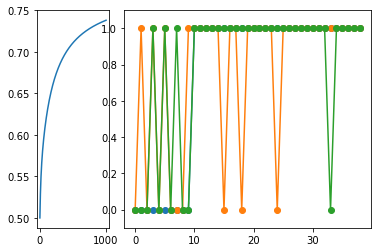

In [11]:
runParkLogReg('parkinsons.data',0.8)

LogReg: Percent correct: Train 85.9 Test 84.6
   QDA: Percent correct: Train 100 Test 92.3


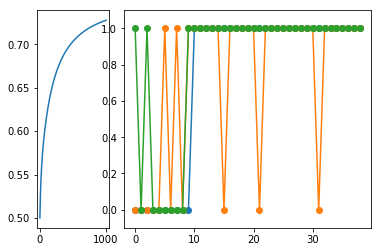

In [12]:
runParkLogReg('parkinsons.data',0.8)

LogReg: Percent correct: Train 84.6 Test 84.6
   QDA: Percent correct: Train 96.8 Test 84.6


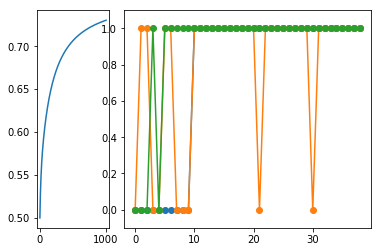

In [13]:
runParkLogReg('parkinsons.data',0.8)

The code above is doing steepest ascent in the gradient of the log
likelihood.  Do we have a better way of doing this gradient ascent?

Hey, how about using Moller's Scaled Conjugate Gradient again?  Just
have to define the function being optimized and its gradient.  The
function to be optimized should be the negative of the log likelihood,
because SCG is designed to minimize the function.  And the gradient
function must also include this negative.  But with these negatives,
SCG will work fine for optimizing the weights in a linear logistic
regression classifier.

This is left for you to do.  You will get clues about how to do this from the neural network implementation of nonlinear logistic regression in the next set of notes.

Here are definitions of the log likehood and its gradient again.
$$
      \begin{align*}
      LL(\wv) & = \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_k(\xv_n)\\
      \grad_{\wv_j} LL(\wv)  & = \sum_{n=1}^N \xv_n (t_{n,j} - g_j(\xv_n))
      \end{align*}
$$

or, as matrices, and using the mean log likelihood,

$$
    \begin{align*}
    Y &= g(\Xv)\\
    LL(\wv) & = \text{np.mean}(T \cdot \log Y , \text{axis}=0) \\
      \grad_{\wv_j} LL(\wv) & =  \Xv^T (T - Y) \;/\; (N (K-1))
    \end{align*}
$$

In [17]:
import scaledconjugategradient as scg

def runParkLogReg2(filename, trainFraction):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]

    data = np.loadtxt(f ,delimiter=',', usecols=1+np.arange(23))

    targetColumn = names.index("status")
    XColumns = np.arange(23)
    XColumns = np.delete(XColumns, targetColumn)
    X = data[:,XColumns]
    T = data[:,targetColumn].reshape((-1,1)) # to keep 2-d matrix form
    names.remove("status")

    healthyI,_ = np.where(T == 0)
    parkI,_ = np.where(T == 1)
    healthyI = np.random.permutation(healthyI)
    parkI = np.random.permutation(parkI)

    nHealthy = round(trainFraction*len(healthyI))
    nPark = round(trainFraction*len(parkI))
    rowsTrain = np.hstack((healthyI[:nHealthy], parkI[:nPark]))
    Xtrain = X[rowsTrain,:]
    Ttrain = T[rowsTrain,:]
    rowsTest = np.hstack((healthyI[nHealthy:], parkI[nPark:]))
    Xtest =  X[rowsTest,:]
    Ttest =  T[rowsTest,:]

    means,stds = np.mean(Xtrain,0), np.std(Xtrain,0)
    Xtrains = standardize(Xtrain,means,stds)
    Xtests = standardize(Xtest,means,stds)
    
    Xtrains1 = np.hstack(( np.ones((Xtrains.shape[0],1)), Xtrains))
    Xtests1 = np.hstack(( np.ones((Xtests.shape[0],1)), Xtests))

    # New stuff for linear logistic regression

    TtrainI = makeIndicatorVars(Ttrain)
    TtestI = makeIndicatorVars(Ttest)
    K = TtrainI.shape[1]
    
    def loglikelihood(warg,K):
        w = warg.reshape((-1,K-1))
        Y = g(Xtrains1,w)
        # print(w)
        return - np.mean(TtrainI*np.log(Y))

    def gradientloglikelihood(warg,K):
        w = warg.reshape((-1,K-1))
        # print('w',w)
        N = Xtrains1.shape[0]
        Y = g(Xtrains1,w)
        # print('Y',Y[:10,:])
        # print('Xtrains1',Xtrains1[:5,:])
        # print('TtrainI',TtrainI[:5,:])
        # print('dot',np.dot(Xtrains1.T,(Y-TtrainI)[:,:-1]))
        # print('N',N,'K',K)
        grad = np.dot(Xtrains1.T, (Y-TtrainI)[:,:-1]) / (N * (K-1))
        return grad.reshape((-1))

    w = np.zeros((Xtrains1.shape[1],TtrainI.shape[1]-1))
    resultSCG = scg.scg(w.reshape((-1)), loglikelihood, gradientloglikelihood, K, nIterations=100, ftracep=True, verbose=False)
    wresult = resultSCG['x']
    w = wresult.reshape((-1,K-1))

    logregOutput = g(Xtrains1,w)
    predictedTrain = np.argmax(logregOutput,axis=1)
    logregOutput = g(Xtests1,w)
    predictedTest = np.argmax(logregOutput,axis=1)

    print("LogReg SCG: Percent correct: Train {:.3g} Test {:.3g}".format(percentCorrect(predictedTrain,Ttrain),percentCorrect(predictedTest,Ttest)))

    # Previous QDA code
    
    Ttr = (Ttrain==0).reshape((-1))
    mu1 = np.mean(Xtrains[Ttr,:],axis=0)
    cov1 = np.cov(Xtrains[Ttr,:].T)
    Ttr = (Ttrain.ravel()==1).reshape((-1))
    mu2 = np.mean(Xtrains[Ttr,:],axis=0)
    cov2 = np.cov(Xtrains[Ttr,:].T)

    d1 = discQDA(Xtrains,means,stds,mu1,cov1,float(nHealthy)/(nHealthy+nPark))
    d2 = discQDA(Xtrains,means,stds,mu2,cov2,float(nPark)/(nHealthy+nPark))
    predictedTrain = np.argmax(np.hstack((d1,d2)),axis=1)

    d1t = discQDA(Xtests,means,stds,mu1,cov1,float(nHealthy)/(nHealthy+nPark))
    d2t = discQDA(Xtests,means,stds,mu2,cov2,float(nPark)/(nHealthy+nPark))
    predictedTest = np.argmax(np.hstack((d1t,d2t)),axis=1)

    print("   QDA: Percent correct: Train {:.3g} Test {:.3g}".format(percentCorrect(predictedTrain,Ttrain),percentCorrect(predictedTest,Ttest)))

In [18]:
runParkLogReg2('parkinsons.data',0.8)

LogReg SCG: Percent correct: Train 92.3 Test 87.2
   QDA: Percent correct: Train 75.6 Test 74.4


In [19]:
runParkLogReg2('parkinsons.data',0.8)

LogReg SCG: Percent correct: Train 92.3 Test 84.6
   QDA: Percent correct: Train 75.6 Test 74.4
